# Heart Disease Prediction using Logistic Regression

## Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

## Load the data

In [2]:
data = pd.read_csv("framingham.csv")
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

## Handling missing values

In [3]:
imputer = SimpleImputer()
X = imputer.fit_transform(X)

## Splitting the dataset into the Training set and Test set

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Scaling

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Training the model

In [6]:
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Predicting a single result

In [7]:
single_pred = model.predict(
    scaler.transform(
        imputer.transform(
            np.array(
                # male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
                [[1, 39, 4, 0, 0, 0, 0, 0, 0, 195, 106, 70, 26.97, 80, 77]]
            )
        )
    )
)[0]

if single_pred == 0:
    print("The person will 'not' have heart disease in the next 10 years.")
elif single_pred == 1:
    print("The person will have heart disease in the next 10 years.")

The person will 'not' have heart disease in the next 10 years.


## Predicting the Test set results

In [8]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 1]
 [0 0]
 [0 0]
 ...
 [0 1]
 [0 0]
 [0 0]]


## Model Evaluation

In [9]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

[[718   7]
 [115   8]]
0.8561320754716981


## Visualizing the Confusion Matrix

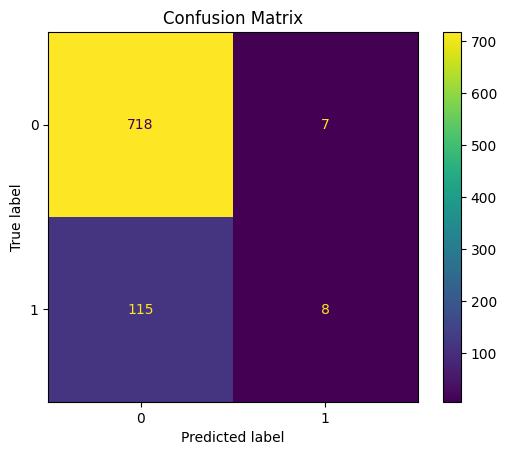

In [10]:
cmd = ConfusionMatrixDisplay(cm, display_labels = model.classes_)
cmd.plot()
plt.title("Confusion Matrix")
plt.show()

## Creating a DataFrame of Actual and Predicted Values and saving it to a CSV file

In [11]:
predictions = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
predictions.to_csv("predictions.csv", index=False)

<hr>